# Data Visualization practicles

## for all practicle i am using single dataset

importing all required libraries

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


importing dataset from github

In [54]:
dataset = "data/rainfall in india 1901-2015.csv"

### Load the dataset and inspect the first few rows to understand its structure and columns.


In [55]:
df = pd.read_csv(dataset)
df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### Check the number of rows, columns, and column names to understand the dataset size and structure.


In [56]:
df.shape

(4116, 19)

### Inspect column names to identify categorical, time-based, and numerical features.


In [57]:
df.columns

Index(['DIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='str')

### Examine data types of each column to detect incorrect or inconsistent data representations.


In [58]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DIVISION  4116 non-null   str    
 1   YEAR      4116 non-null   int64  
 2   JAN       4112 non-null   float64
 3   FEB       4113 non-null   float64
 4   MAR       4110 non-null   float64
 5   APR       4112 non-null   float64
 6   MAY       4113 non-null   float64
 7   JUN       4111 non-null   float64
 8   JUL       4109 non-null   float64
 9   AUG       4112 non-null   float64
 10  SEP       4110 non-null   float64
 11  OCT       4109 non-null   float64
 12  NOV       4105 non-null   float64
 13  DEC       4106 non-null   float64
 14  ANNUAL    4090 non-null   float64
 15  Jan-Feb   4110 non-null   float64
 16  Mar-May   4107 non-null   float64
 17  Jun-Sep   4106 non-null   float64
 18  Oct-Dec   4103 non-null   float64
dtypes: float64(17), int64(1), str(1)
memory usage: 611.1 KB


### Quantify missing values to understand their extent and decide an appropriate handling strategy.


In [59]:
# count missing values
missing_count = df.isnull().sum()

# percentage of missing values
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame(
    {"Missing_Count": missing_count, "Missing_Percent": missing_percent}
)

missing_df.sort_values("Missing_Count", ascending=False)

,Missing_Count,Missing_Percent
ANNUAL,26,0.631681
Oct-Dec,13,0.315841
NOV,11,0.267250
Jun-Sep,10,0.242954
DEC,10,0.242954
Mar-May,9,0.218659
JUL,7,0.170068
OCT,7,0.170068
MAR,6,0.145773
Jan-Feb,6,0.145773


### Visualize missing values to understand their distribution across the dataset.


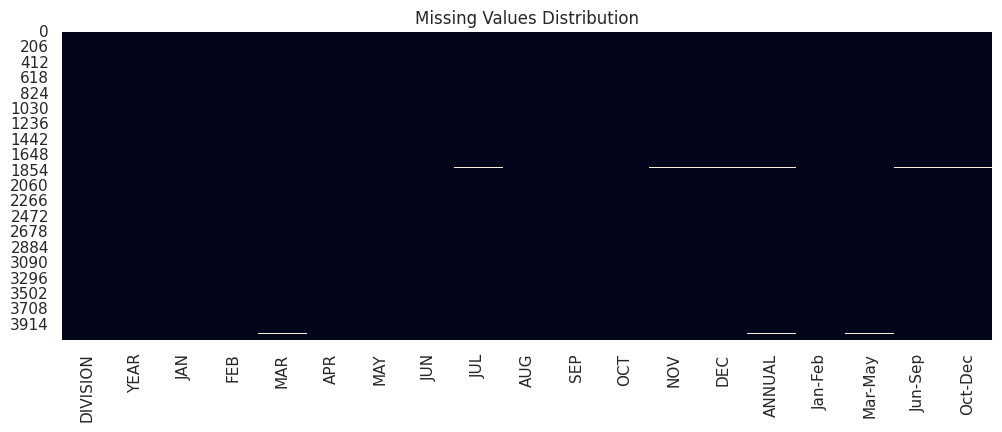

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Distribution")
plt.show()

### Validate whether derived columns (annual and seasonal rainfall) are consistent with monthly rainfall values.


In [61]:
# define month groups
months = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]

# recompute totals from monthly data
df["ANNUAL_CALC"] = df[months].sum(axis=1)

df["Jan-Feb_CALC"] = df["JAN"] + df["FEB"]
df["Mar-May_CALC"] = df["MAR"] + df["APR"] + df["MAY"]
df["Jun-Sep_CALC"] = df["JUN"] + df["JUL"] + df["AUG"] + df["SEP"]
df["Oct-Dec_CALC"] = df["OCT"] + df["NOV"] + df["DEC"]

# calculate differences
diff_df = pd.DataFrame(
    {
        "ANNUAL_DIFF": df["ANNUAL"] - df["ANNUAL_CALC"],
        "Jan-Feb_DIFF": df["Jan-Feb"] - df["Jan-Feb_CALC"],
        "Mar-May_DIFF": df["Mar-May"] - df["Mar-May_CALC"],
        "Jun-Sep_DIFF": df["Jun-Sep"] - df["Jun-Sep_CALC"],
        "Oct-Dec_DIFF": df["Oct-Dec"] - df["Oct-Dec_CALC"],
    }
)

diff_df.describe()

,ANNUAL_DIFF,Jan-Feb_DIFF,Mar-May_DIFF,Jun-Sep_DIFF,Oct-Dec_DIFF
count,4090.000000,4110.000000,4107.000000,4.106000e+03,4103.000000
mean,0.002200,-0.000414,0.000341,2.435460e-05,0.001706
std,0.098906,0.042636,0.056354,6.178426e-02,0.052132
min,-0.300000,-0.100000,-0.100000,-2.000000e-01,-0.100000
25%,-0.100000,0.000000,0.000000,-1.136868e-13,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,0.100000,0.000000,0.000000,1.136868e-13,0.000000
max,0.400000,0.100000,0.100000,2.000000e-01,0.100000


### Remove derived rainfall columns to avoid redundancy and recompute them later from monthly data.


In [62]:
# drop derived columns (will recompute later)
df.drop(columns=["ANNUAL", "Jan-Feb", "Mar-May", "Jun-Sep", "Oct-Dec"], inplace=True)

df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_CALC,Jan-Feb_CALC,Mar-May_CALC,Jun-Sep_CALC,Oct-Dec_CALC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### Handle missing values in monthly rainfall columns using a robust imputation strategy.


In [63]:
# list of monthly columns
months = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]

# check missing before
df[months].isnull().sum()

JAN     4
FEB     3
MAR     6
APR     4
MAY     3
JUN     5
JUL     7
AUG     4
SEP     6
OCT     7
NOV    11
DEC    10
dtype: int64

### Impute missing monthly rainfall values using the median to preserve the distribution.


In [64]:
# median imputation for monthly rainfall
df[months] = df[months].fillna(df[months].median())

# verify no missing values remain
df[months].isnull().sum()

JAN    0
FEB    0
MAR    0
APR    0
MAY    0
JUN    0
JUL    0
AUG    0
SEP    0
OCT    0
NOV    0
DEC    0
dtype: int64

### Recompute annual and seasonal rainfall totals from the cleaned monthly data.


In [65]:
# recompute seasonal and annual rainfall
df["ANNUAL"] = df[months].sum(axis=1)

df["Jan-Feb"] = df["JAN"] + df["FEB"]
df["Mar-May"] = df["MAR"] + df["APR"] + df["MAY"]
df["Jun-Sep"] = df["JUN"] + df["JUL"] + df["AUG"] + df["SEP"]
df["Oct-Dec"] = df["OCT"] + df["NOV"] + df["DEC"]

df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,ANNUAL_CALC,Jan-Feb_CALC,Mar-May_CALC,Jun-Sep_CALC,Oct-Dec_CALC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,3373.2,136.3,560.3,1696.3,980.3,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,3520.7,159.8,458.3,2185.9,716.7,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,2957.4,156.7,236.1,1874.0,690.6,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,3079.6,24.1,506.9,1977.6,571.0,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,2566.7,1.3,309.7,1624.9,630.8,2566.7,1.3,309.7,1624.9,630.8


### Remove temporary helper columns used for validation to finalize the clean dataset.


In [66]:
# drop helper calculation columns
df.drop(
    columns=[
        "ANNUAL_CALC",
        "Jan-Feb_CALC",
        "Mar-May_CALC",
        "Jun-Sep_CALC",
        "Oct-Dec_CALC",
    ],
    inplace=True,
)

df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### Perform a final sanity check to ensure the dataset is clean and ready for analysis.


In [67]:
# final shape
df.shape

(4116, 19)

### Confirm that there are no missing values and all columns have appropriate data types.


In [68]:
# check missing values
df.isnull().sum()

DIVISION    0
YEAR        0
JAN         0
FEB         0
MAR         0
APR         0
MAY         0
JUN         0
JUL         0
AUG         0
SEP         0
OCT         0
NOV         0
DEC         0
ANNUAL      0
Jan-Feb     0
Mar-May     0
Jun-Sep     0
Oct-Dec     0
dtype: int64

### Get a high-level statistical overview of rainfall data to understand distributions before visualization.


In [69]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.944728,21.794315,27.330685,43.100777,85.709597,230.123251,347.108188,290.233503,197.327721,95.455466,39.785010,18.832021,1415.745262,40.739043,156.141059,1064.792663,154.072498
std,33.140898,33.571472,35.898711,46.931111,67.803579,123.197115,234.589793,269.322595,188.681158,135.312552,99.442295,68.611462,42.325312,906.694433,59.279292,201.379216,707.408770,166.961296
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.200000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.300000,4.100000,24.200000,574.225000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1123.650000,19.150000,75.100000,880.800000,97.950000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.500000,1651.025000,50.400000,197.625000,1288.200000,213.025000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4537.000000,1252.500000


# Section A

## 1. Create a simple bar chart using student marks or sales data and explain what it shows.

### Practical 1: Bar Chart Representation
This bar chart represents the annual rainfall values for selected years, similar to total sales or total marks comparison.


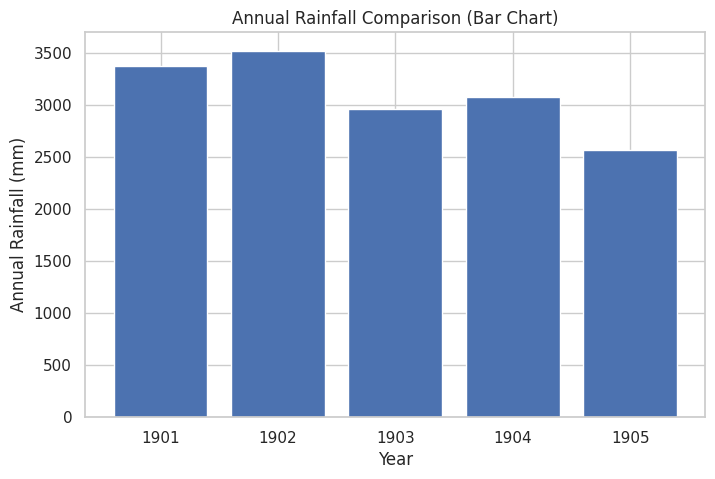

In [70]:
data_bar = df[df["DIVISION"] == "ANDAMAN & NICOBAR ISLANDS"].head(5)

plt.figure(figsize=(8, 5))
plt.bar(data_bar["YEAR"], data_bar["ANNUAL"])
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Annual Rainfall Comparison (Bar Chart)")
plt.show()

This bar chart shows the comparison of annual rainfall for different years.
Each bar represents total rainfall in a year.
Bar charts are useful for comparing quantities across categories such as years, students, or products.

## 02. Draw a line chart to represent time-based data (e.g., monthly attendance or sales).

### Practical 2: Line Chart for Time-Based Data
A line chart is used to observe trends and changes over time.


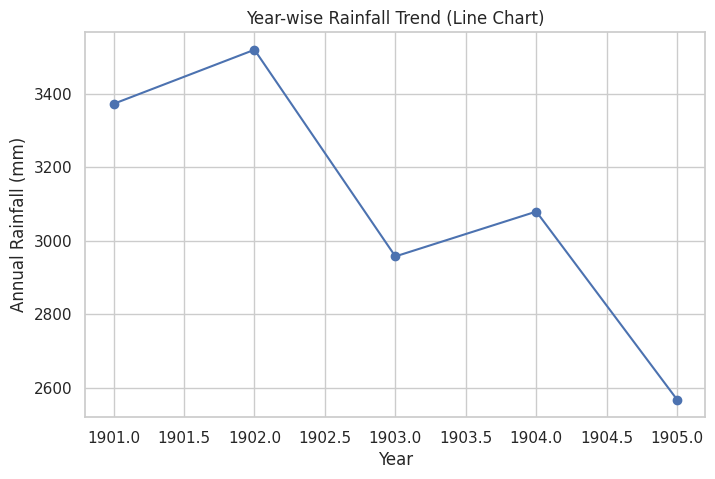

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(data_bar["YEAR"], data_bar["ANNUAL"], marker="o")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Year-wise Rainfall Trend (Line Chart)")
plt.show()

The line chart shows how rainfall changes over time.
It helps in identifying increasing or decreasing trends, which is useful for analyzing attendance, sales growth, or performance over years.

## 03. Perform data representation vs data presentation for the same dataset using at least two different chart types.

### Practical 3: Data Representation vs Data Presentation
The same dataset can be shown using different charts for better understanding.


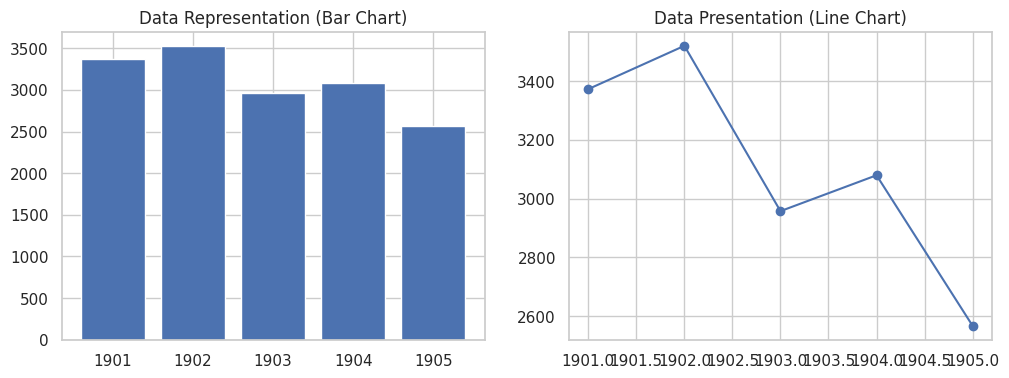

In [72]:
plt.figure(figsize=(12, 4))

# Representation (Bar)
plt.subplot(1, 2, 1)
plt.bar(data_bar["YEAR"], data_bar["ANNUAL"])
plt.title("Data Representation (Bar Chart)")

# Presentation (Line)
plt.subplot(1, 2, 2)
plt.plot(data_bar["YEAR"], data_bar["ANNUAL"], marker="o")
plt.title("Data Presentation (Line Chart)")

plt.show()

Data representation focuses on showing values clearly, while data presentation focuses on making data easy to understand and visually appealing.

## 04. Identify the purpose of data visualization for a given dataset and use a donut chart.

### Practical 4: Purpose of Data Visualization Using Donut Chart
A donut chart shows proportional contribution of different categories.


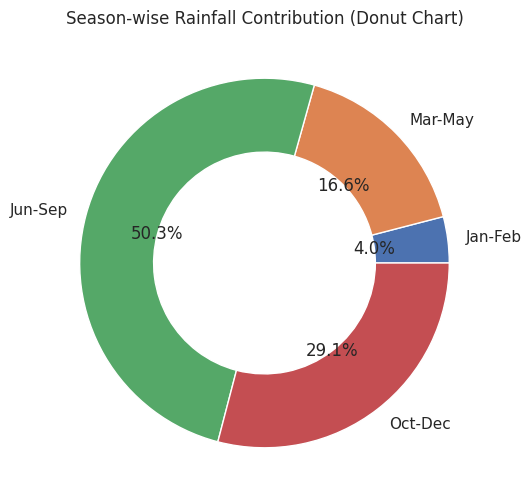

In [73]:
values = [
    data_bar.iloc[0]["Jan-Feb"],
    data_bar.iloc[0]["Mar-May"],
    data_bar.iloc[0]["Jun-Sep"],
    data_bar.iloc[0]["Oct-Dec"],
]

labels = ["Jan-Feb", "Mar-May", "Jun-Sep", "Oct-Dec"]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=dict(width=0.4))
plt.title("Season-wise Rainfall Contribution (Donut Chart)")
plt.show()

The purpose of data visualization is to present complex data in an easy-to-understand form.
This donut chart shows how different seasons contribute to total rainfall.

## 05. Explain the seven stages of data visualization using a simple example.

1. Data Collection – Collect rainfall data.
2. Data Cleaning – Remove missing or incorrect values.
3. Data Analysis – Calculate totals and trends.
4. Data Selection – Choose important attributes.
5. Visualization Design – Select suitable chart type.
6. Visualization Creation – Draw charts using tools.
7. Interpretation – Analyze results and draw conclusions.


## 06. Create one basic visualization using any data visualization tool (Excel / Google Sheets / Tableau / Power BI).

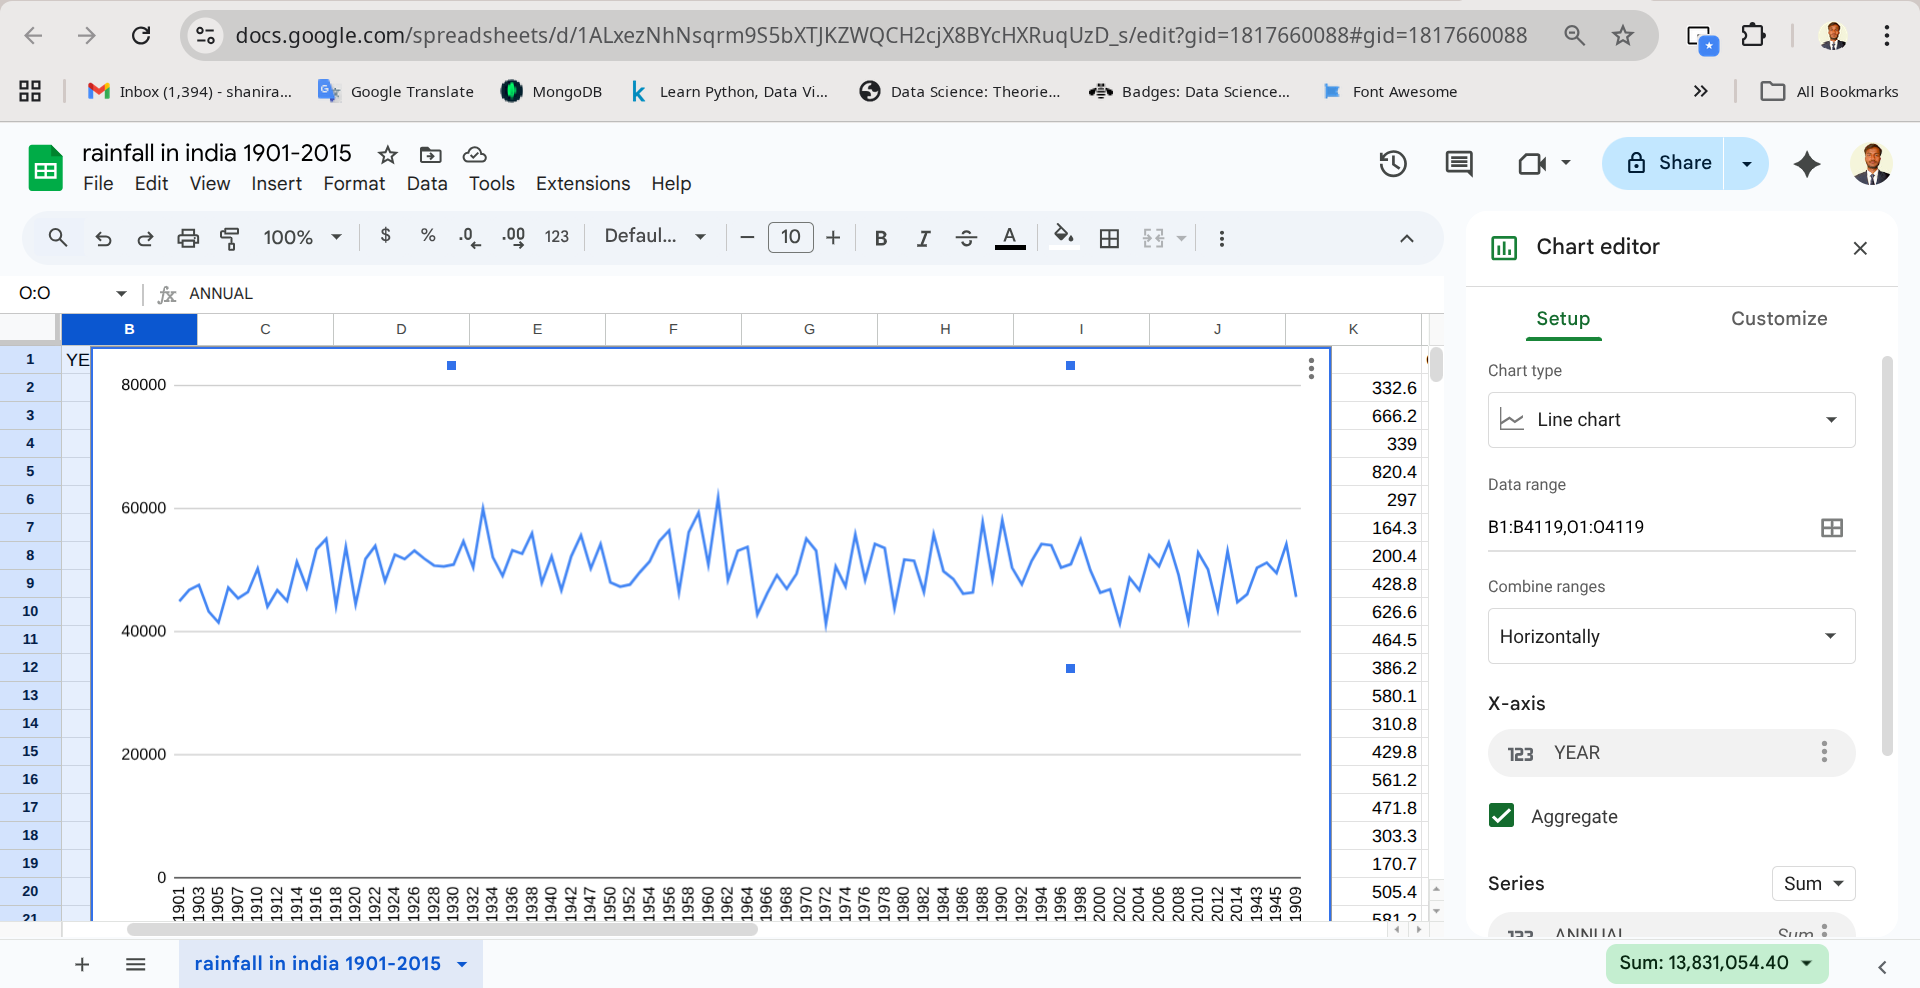

In [74]:
from IPython.display import Image

image_path = "data/practicle6.png"

Image(filename=image_path)

# Section B

## 7.Create an area chart for time-series data such as yearly profit or rainfall data.

### Practical 7: Area Chart for Time-Series Data
An area chart shows how values change over time and emphasizes magnitude.


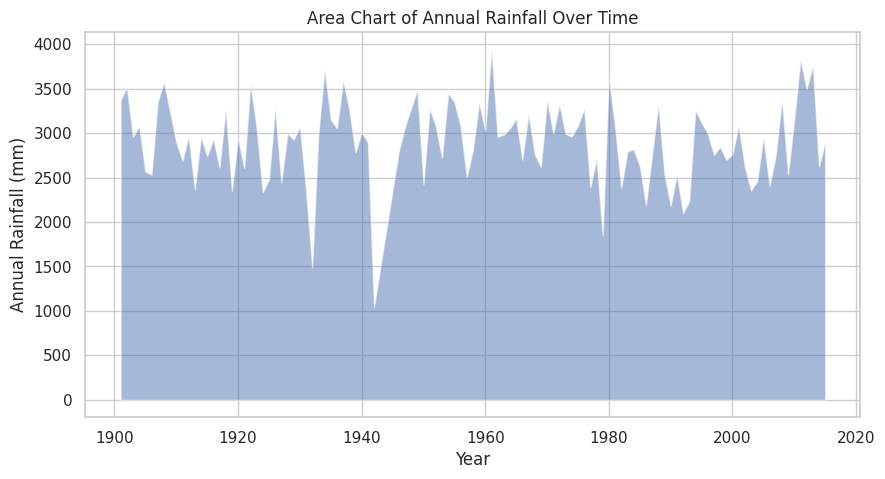

In [75]:
data_area = df[df["DIVISION"] == "ANDAMAN & NICOBAR ISLANDS"]

plt.figure(figsize=(10, 5))
plt.fill_between(data_area["YEAR"], data_area["ANNUAL"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Area Chart of Annual Rainfall Over Time")
plt.show()

The area chart highlights the overall increase or decrease in rainfall over time.
It emphasizes the magnitude of values compared to a line chart.

## 8.Draw a scatter plot to show the relationship between two variables (e.g., study hours vs marks).


### Practical 8: Scatter Plot to Show Relationship Between Two Variables
A scatter plot shows correlation between two numeric variables.


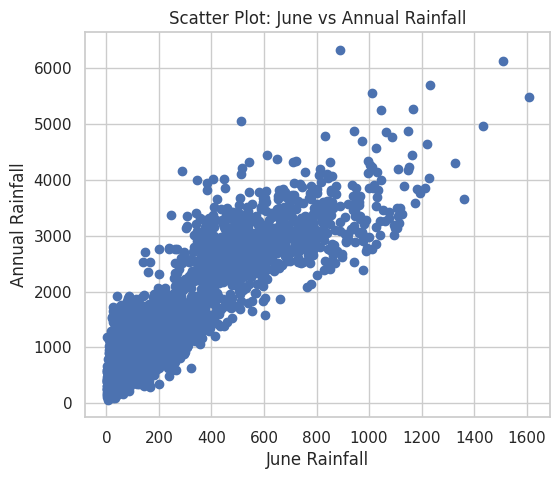

In [76]:
plt.figure(figsize=(6, 5))
plt.scatter(df["JUN"], df["ANNUAL"])
plt.xlabel("June Rainfall")
plt.ylabel("Annual Rainfall")
plt.title("Scatter Plot: June vs Annual Rainfall")
plt.show()

The scatter plot shows the relationship between June rainfall and annual rainfall.
If points trend upward, it indicates positive correlation.

## 9.Create a pivot table and a pivot chart using a simple dataset.

### Practical 9: Pivot Table and Pivot Chart
A pivot table summarizes data based on categories.


In [77]:
pivot_table = pd.pivot_table(df, values="ANNUAL", index="DIVISION", aggfunc="mean")

pivot_table.head()

,ANNUAL
DIVISION,
ANDAMAN & NICOBAR ISLANDS,2895.452727
ARUNACHAL PRADESH,3421.046392
ASSAM & MEGHALAYA,2580.698261
BIHAR,1197.637391
CHHATTISGARH,1371.732174


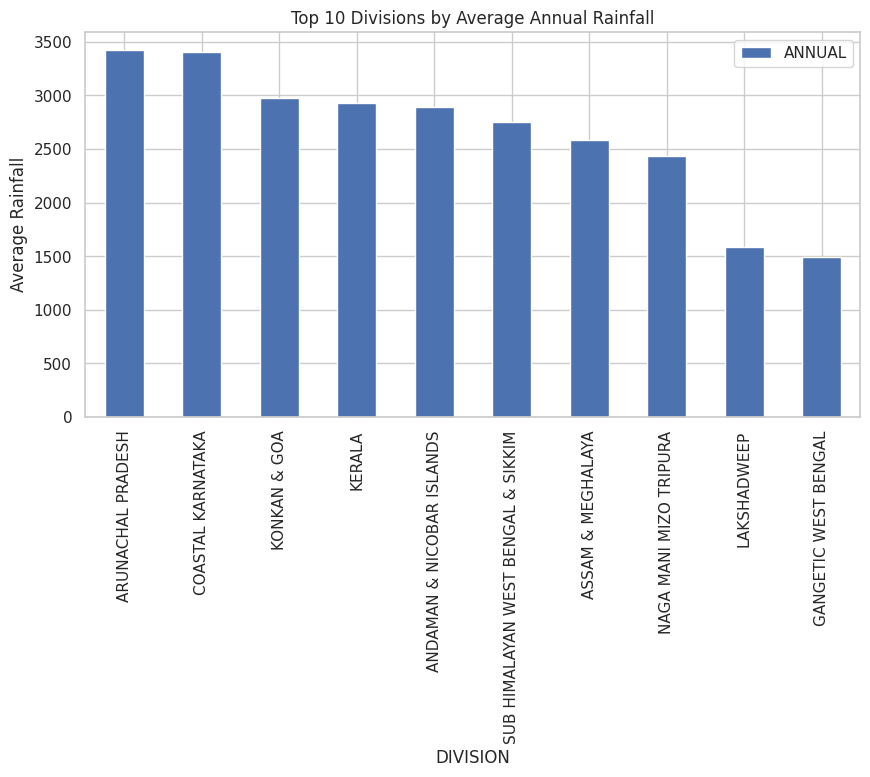

In [78]:
pivot_table.sort_values("ANNUAL", ascending=False).head(10).plot(
    kind="bar", figsize=(10, 5)
)
plt.title("Top 10 Divisions by Average Annual Rainfall")
plt.ylabel("Average Rainfall")
plt.show()

The pivot table calculates average rainfall for each division.
The pivot chart visually compares divisions.

## 10.Design a tree map to represent category-wise data (e.g., department-wise student count).

### Practical 10: Tree Map Representation
A tree map shows hierarchical data using rectangle sizes.


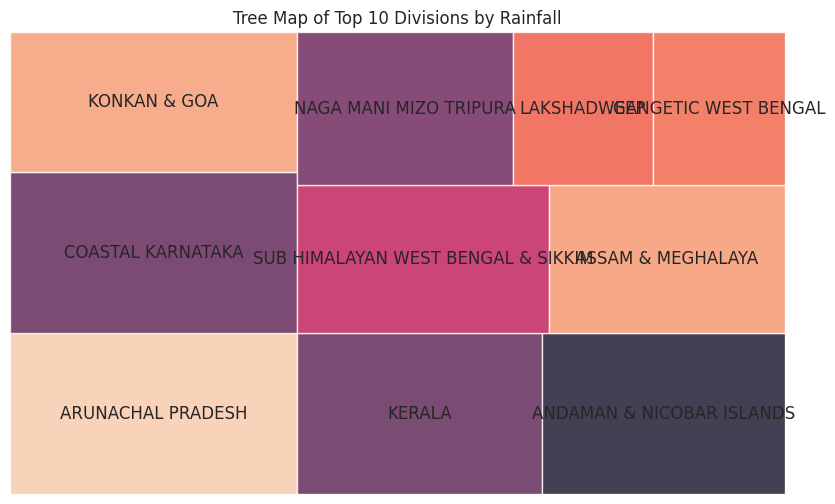

In [79]:
import squarify

top_div = pivot_table.sort_values("ANNUAL", ascending=False).head(10)

plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_div["ANNUAL"], label=top_div.index, alpha=0.8)
plt.title("Tree Map of Top 10 Divisions by Rainfall")
plt.axis("off")
plt.show()

The tree map shows category-wise rainfall using rectangle size.
Larger rectangles represent higher rainfall.

## 11.Draw a simple node-link diagram to show relationships (e.g., friends in a class).

### Practical 11: Node-Link Diagram
A node-link diagram shows relationships between entities.


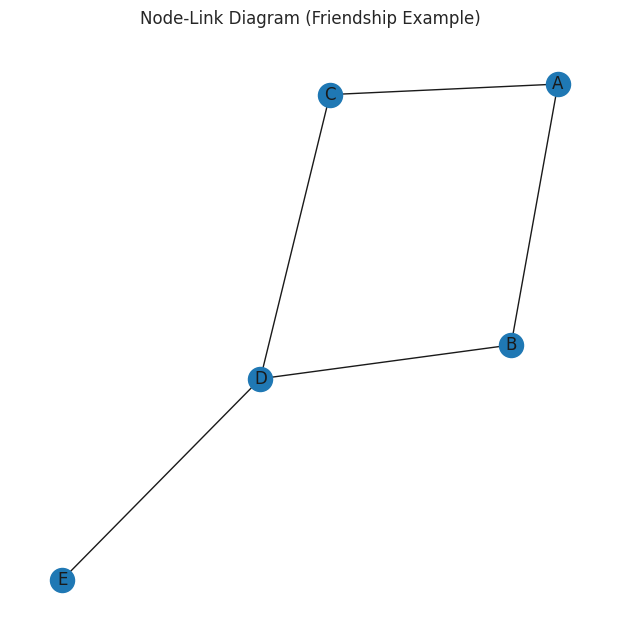

In [80]:
import networkx as nx

G = nx.Graph()

edges = [("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("D", "E")]

G.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True)
plt.title("Node-Link Diagram (Friendship Example)")
plt.show()

Nodes represent individuals and lines represent relationships.
It is useful for showing social networks or connections.

## 12.Visualize the correlation between different numeric variables in a dataset using a color-coded matrix (heatmap).

### Practical 12: Correlation Heatmap
A heatmap shows correlation between numeric variables using colors.


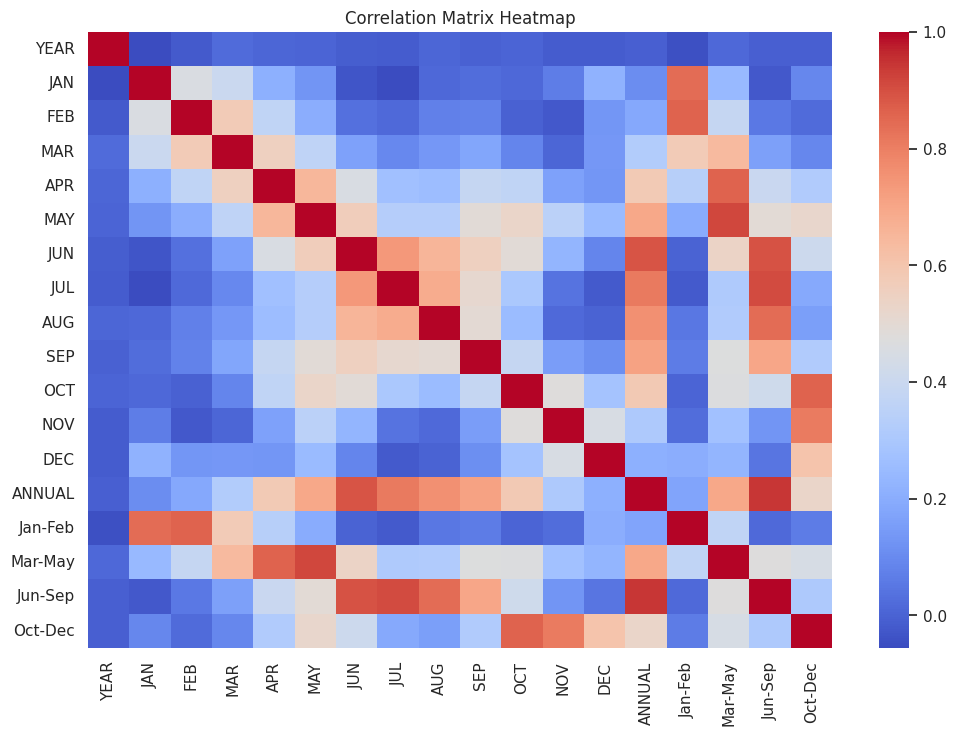

In [82]:
# select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap shows relationships between numeric variables.
Dark red indicates strong positive correlation.
Blue indicates negative correlation.

# Section C

## 13.Create a time-series visualization with multiple variables and analyze the observed patterns.

### Practical 13: Multi-Variable Time-Series Visualization
This chart shows rainfall for multiple months over time.


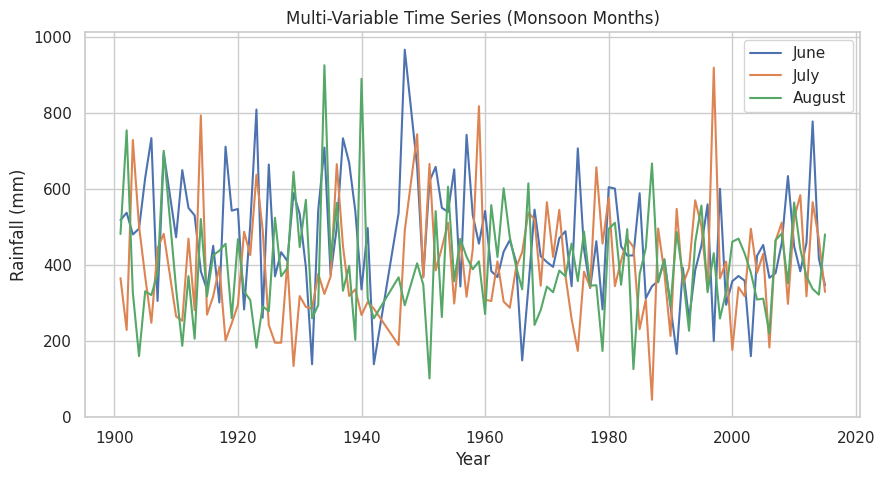

In [83]:
data_ts = df[df["DIVISION"] == "ANDAMAN & NICOBAR ISLANDS"]

plt.figure(figsize=(10, 5))
plt.plot(data_ts["YEAR"], data_ts["JUN"], label="June")
plt.plot(data_ts["YEAR"], data_ts["JUL"], label="July")
plt.plot(data_ts["YEAR"], data_ts["AUG"], label="August")

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Multi-Variable Time Series (Monsoon Months)")
plt.legend()
plt.show()

July generally shows higher rainfall compared to June and August.
Monsoon rainfall fluctuates across years but follows similar seasonal patterns.

## 14.Perform text visualization by counting word frequency from a paragraph and plotting it.

### Practical 14: Text Visualization Using Word Frequency
This example counts word frequency from a paragraph.


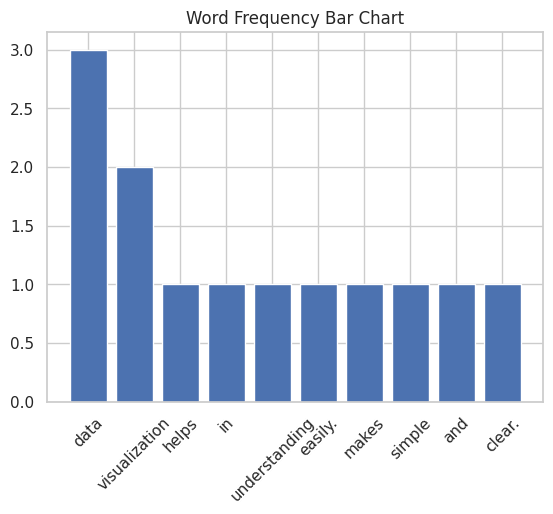

In [84]:
from collections import Counter

text = "Data visualization helps in understanding data easily. Visualization makes data simple and clear."

words = text.lower().split()
word_count = Counter(words)

plt.bar(word_count.keys(), word_count.values())
plt.xticks(rotation=45)
plt.title("Word Frequency Bar Chart")
plt.show()

The bar chart shows the frequency of each word.
Text visualization helps identify important keywords.

## 15.Create a simple multivariate chart using more than two variables (e.g., marks in three subjects).

### Practical 15: Multivariate Chart
Comparison of rainfall in three months.


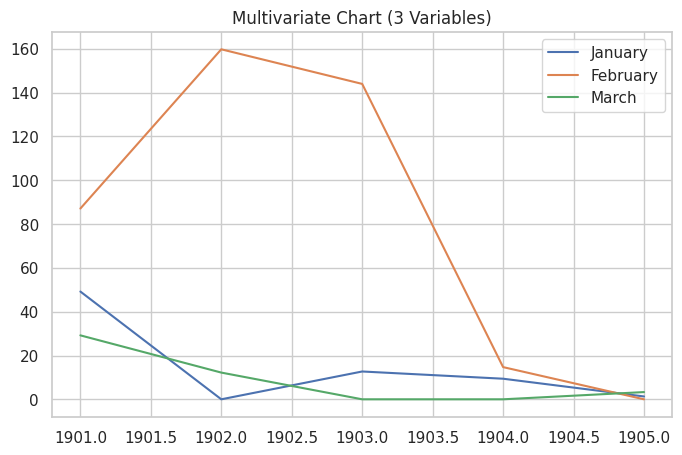

In [85]:
data_multi = data_ts.head(5)

plt.figure(figsize=(8, 5))
plt.plot(data_multi["YEAR"], data_multi["JAN"], label="January")
plt.plot(data_multi["YEAR"], data_multi["FEB"], label="February")
plt.plot(data_multi["YEAR"], data_multi["MAR"], label="March")

plt.legend()
plt.title("Multivariate Chart (3 Variables)")
plt.show()

This chart compares rainfall in three months simultaneously.
It helps analyze relationships between multiple variables.

## 16.Study a small case example where visualization helps in understanding data easily.

Suppose a school wants to analyze student performance.
Instead of reading raw marks in a table, a bar chart quickly shows which subject has highest or lowest marks.
Visualization makes complex data easy to interpret.

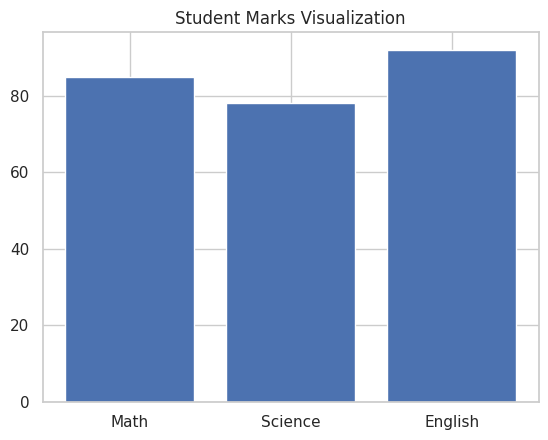

In [86]:
subjects = ["Math", "Science", "English"]
marks = [85, 78, 92]

plt.bar(subjects, marks)
plt.title("Student Marks Visualization")
plt.show()

## 17.Create a live-like data visualization using continuously updated values (manual update is allowed).

### Practical 17: Live-Like Data Visualization
Simulating live updating data.


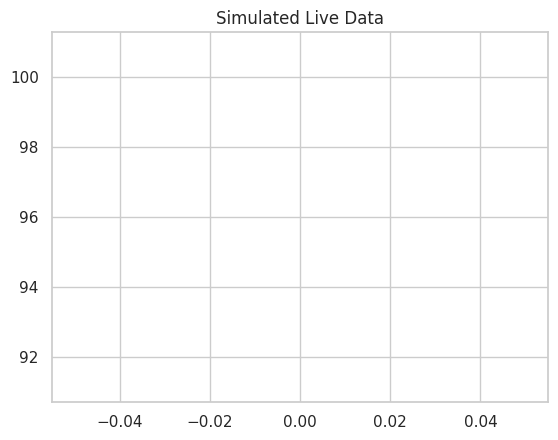

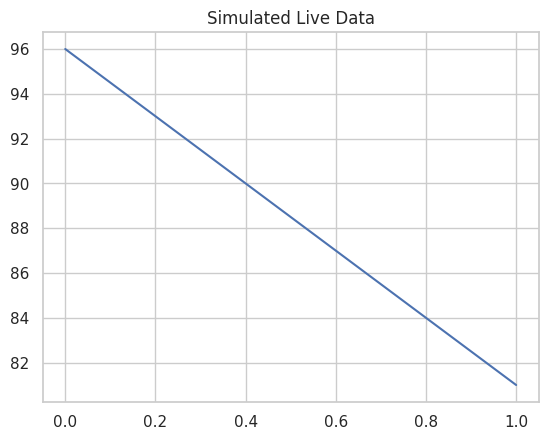

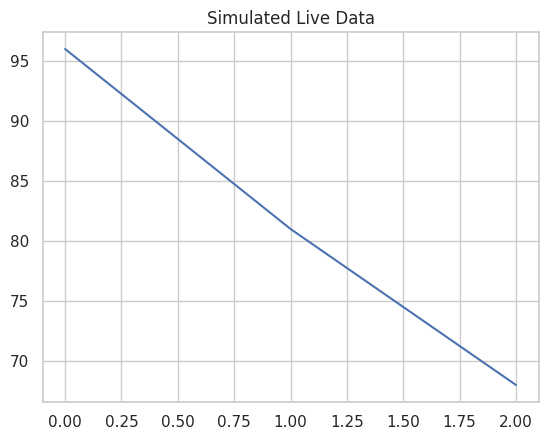

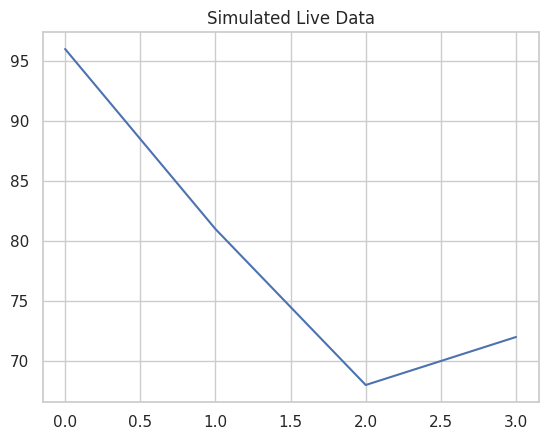

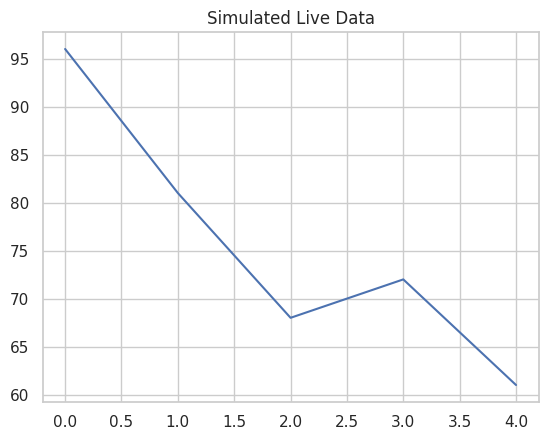

In [87]:
import time
import random

values = []

plt.figure()

for i in range(5):
    values.append(random.randint(50, 100))
    plt.clf()
    plt.plot(values)
    plt.title("Simulated Live Data")
    plt.pause(1)

plt.show()

The graph updates every second to simulate live data such as stock prices or sensor readings.

## 18.Write basic rules or best practices for creating good visualizations with examples.

### Best Practices for Good Visualization

1. Choose the correct chart type (Line for trends, Bar for comparison).
2. Keep visualization simple and uncluttered.
3. Label axes clearly.
4. Use appropriate colors.
5. Avoid misleading scales.
6. Add title and legend.
7. Focus on key insights.


For example, using a line chart for time-based rainfall data helps identify trends clearly compared to a pie chart.

# Section D

## 19. Create a basic chart to show open and closed ports from given data.

### Practical 19: Visualization of Open and Closed Ports
This chart represents the number of open and closed ports in a system.


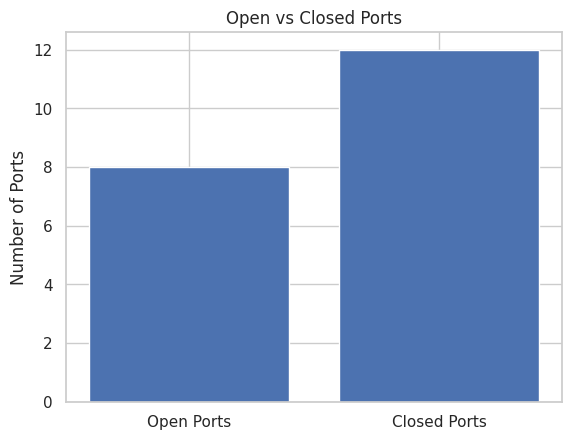

In [88]:
ports = {"Open Ports": 8, "Closed Ports": 12}

plt.bar(ports.keys(), ports.values())
plt.title("Open vs Closed Ports")
plt.ylabel("Number of Ports")
plt.show()

The bar chart shows the number of open and closed ports.
Open ports may indicate possible entry points for attackers.

## 20. Create a firewall log visualization to identify suspicious traffic patterns.

### Practical 20: Firewall Log Visualization
This visualization identifies suspicious traffic attempts.


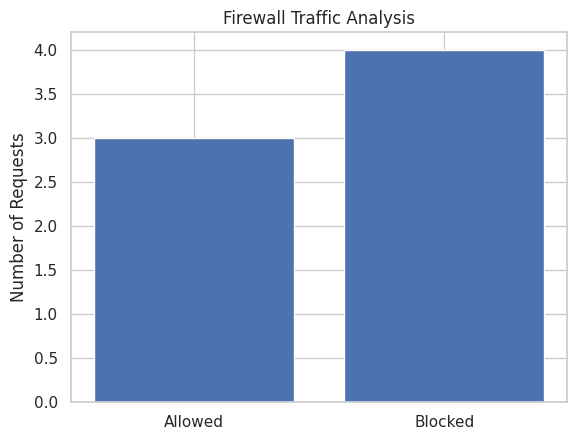

In [89]:
traffic = ["Allowed", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Allowed"]
from collections import Counter

traffic_count = Counter(traffic)

plt.bar(traffic_count.keys(), traffic_count.values())
plt.title("Firewall Traffic Analysis")
plt.ylabel("Number of Requests")
plt.show()

High number of blocked requests may indicate suspicious or malicious activity.

## 21.Design an intrusion detection log visualization and highliglit possible attacks.

### Practical 21: Intrusion Detection Visualization
This chart highlights different types of detected attacks.


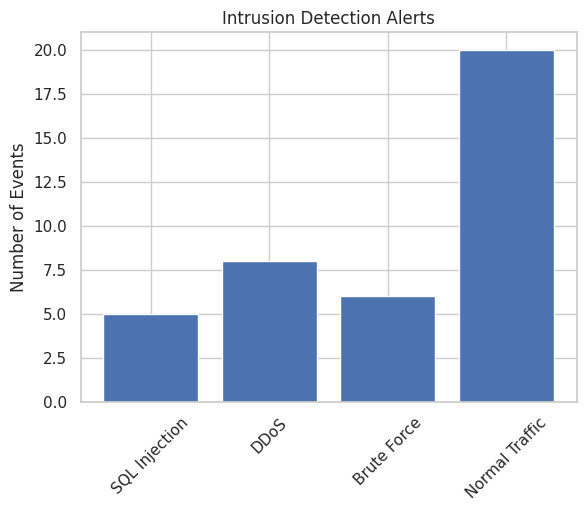

In [90]:
attacks = {"SQL Injection": 5, "DDoS": 8, "Brute Force": 6, "Normal Traffic": 20}

plt.bar(attacks.keys(), attacks.values())
plt.xticks(rotation=45)
plt.title("Intrusion Detection Alerts")
plt.ylabel("Number of Events")
plt.show()

The visualization shows the frequency of detected attack types.
Higher DDoS or brute force counts indicate potential security threats.

## 22.Write a program to implement sentiment analysis on the iive tweet data using Python libraries.

### Practical 22: Sentiment Analysis Using Python
Sentiment analysis determines whether text is positive, negative, or neutral.


In [92]:
from textblob import TextBlob

tweets = [
    "I love data visualization!",
    "This system is terrible and slow.",
    "The service is okay.",
]

for tweet in tweets:
    analysis = TextBlob(tweet)
    print(f"Tweet: {tweet}")
    print("Sentiment:", analysis.sentiment.polarity)
    print()

Tweet: I love data visualization!
Sentiment: 0.625

Tweet: This system is terrible and slow.
Sentiment: -0.65

Tweet: The service is okay.
Sentiment: 0.5



Polarity > 0 → Positive    
Polarity < 0 → Negative     
Polarity = 0 → Neutral

## 23.Write a program to create interactive visualizations to monitor device activity for Pre-processed simulated IoT data streams in real-time.

### Practical 23: Simulated Real-Time IoT Monitoring Using Matplotlib

Simulated real-time monitoring of device temperature.


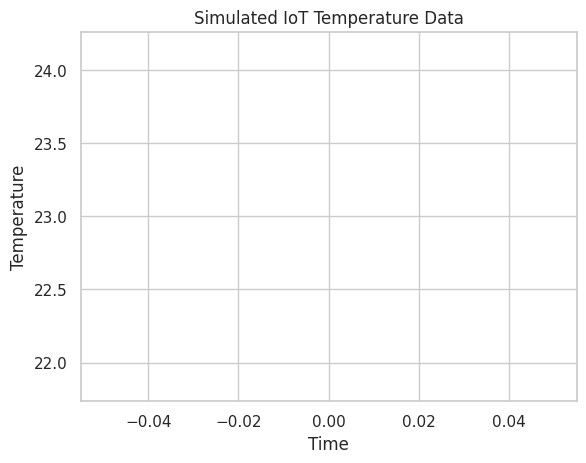

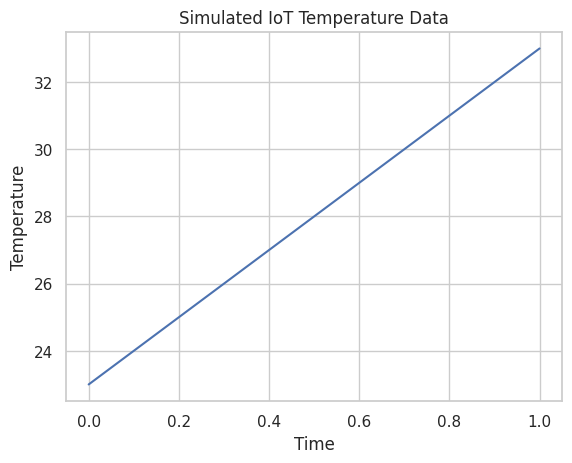

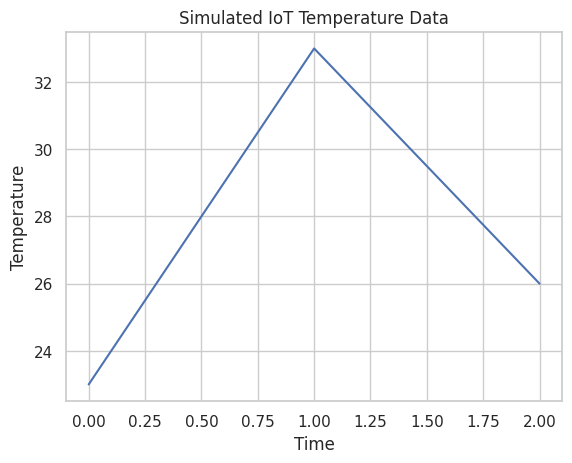

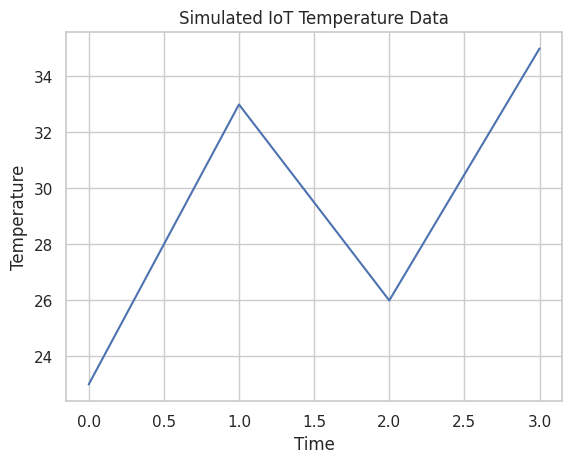

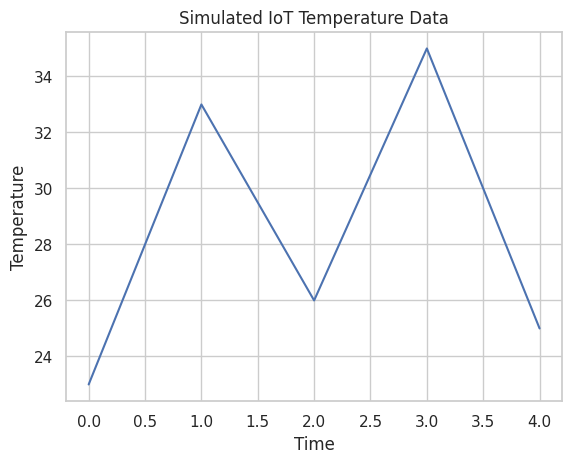

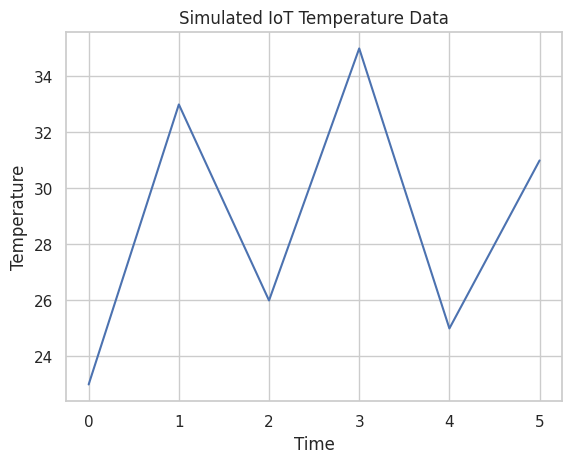

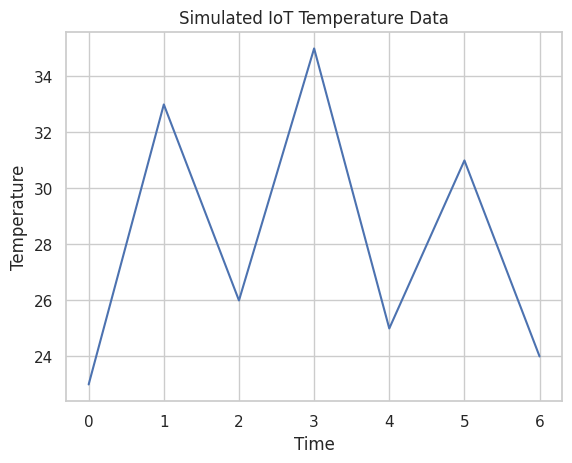

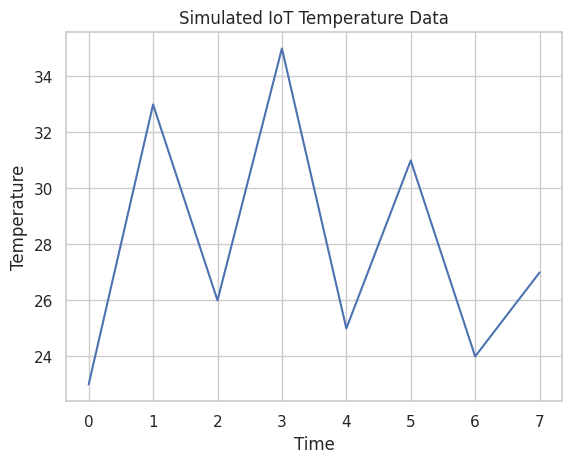

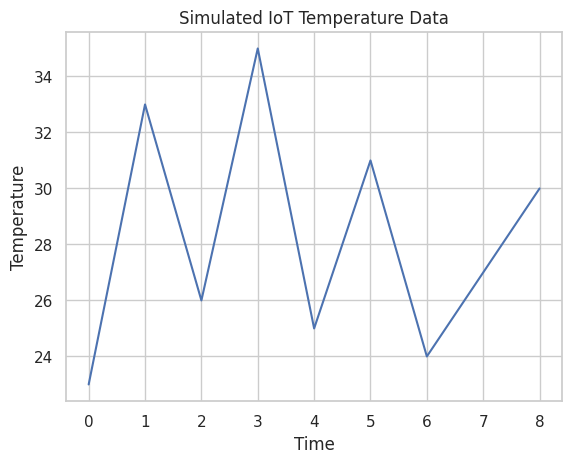

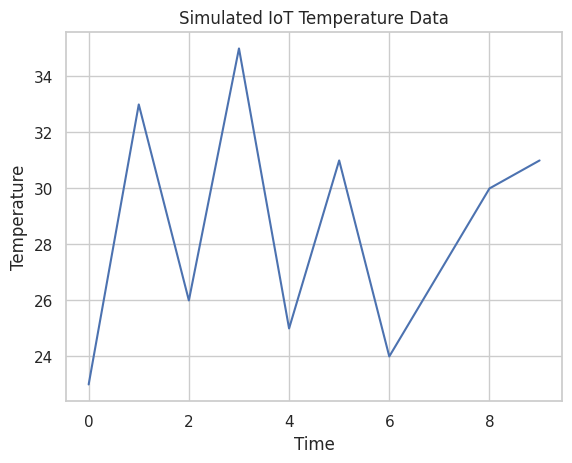

In [97]:
import matplotlib.pyplot as plt
import random
import time

values = []

plt.figure()

for i in range(10):
    values.append(random.randint(20, 35))
    plt.clf()
    plt.plot(values)
    plt.title("Simulated IoT Temperature Data")
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.pause(0.5)

plt.show()

## 24.Design a secured data visualization system architecture and explain the security measures used.

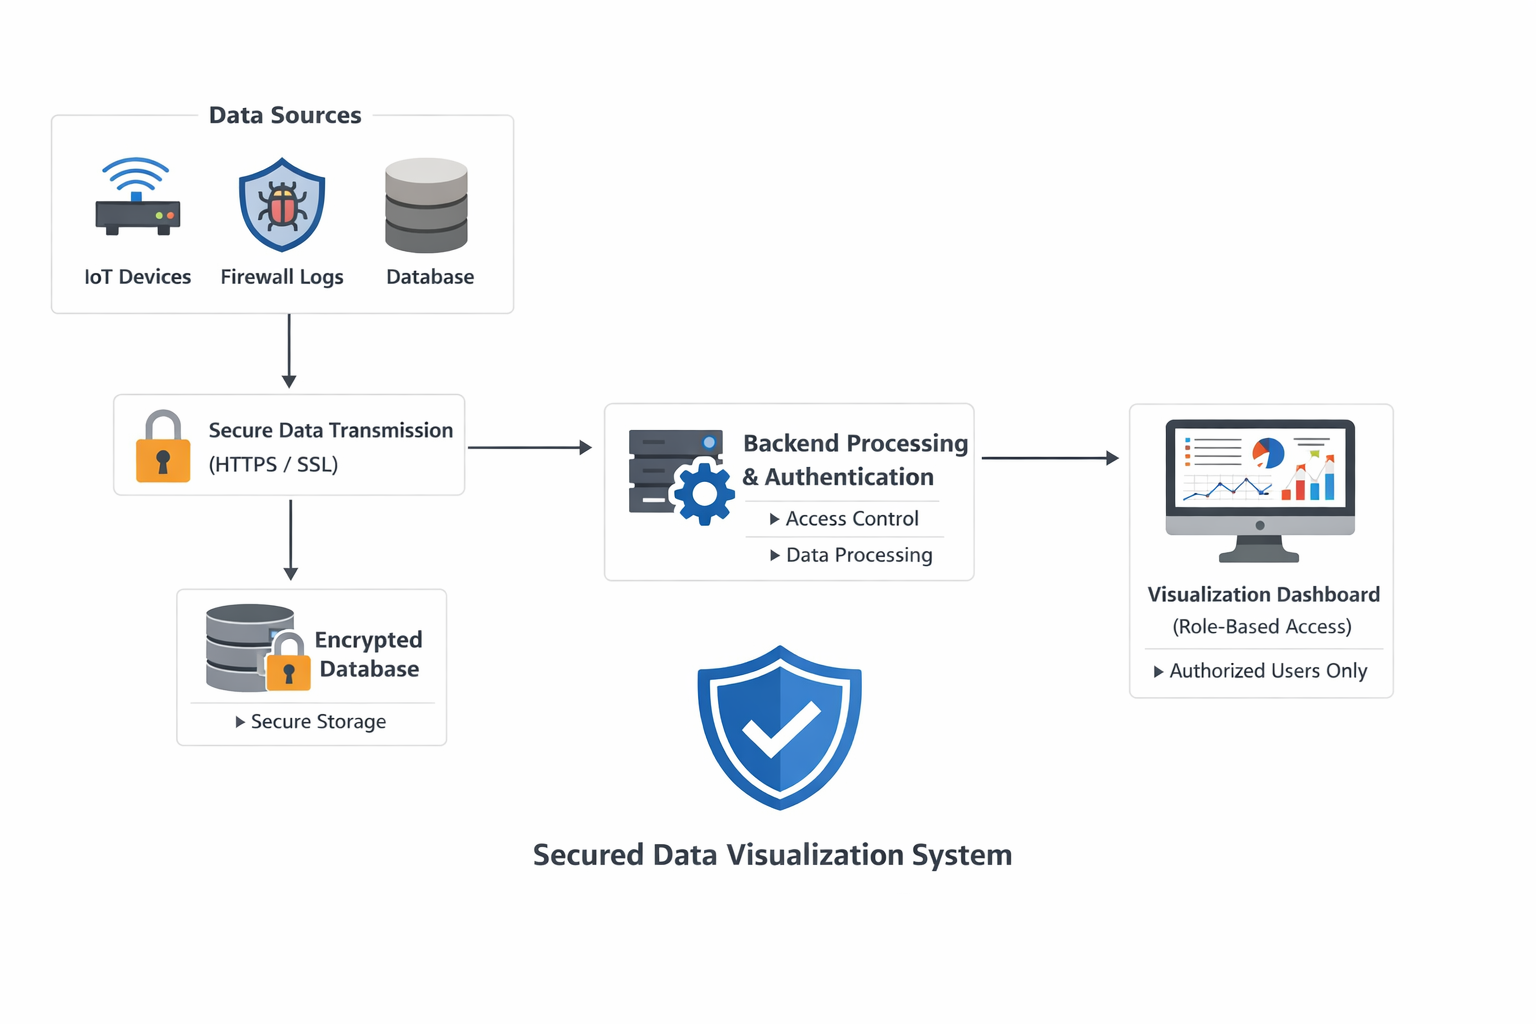

In [98]:
from IPython.display import Image

image_path = "data/practicle24.png"

Image(filename=image_path)

# Security Measures Used in Secured Data Visualization System

A secured data visualization system must protect sensitive data at every stage — from data collection to dashboard display. The following security measures are implemented:

---

## 1. HTTPS / SSL Encryption (Secure Data Transmission)

All data transmitted between:
- Data sources (IoT devices, logs, databases)
- Backend server
- Visualization dashboard

is encrypted using HTTPS with SSL/TLS protocols.

### Why it is important:
- Prevents data interception (Man-in-the-Middle attacks)
- Protects credentials and sensitive information
- Ensures data integrity during transmission

---

## 2. Role-Based Access Control (RBAC)

RBAC ensures that users can only access data according to their assigned roles.

### Example:
- Admin → Can view and manage all dashboards
- Analyst → Can view specific reports
- Viewer → Read-only access

### Why it is important:
- Prevents unauthorized access
- Limits data exposure
- Reduces insider threats

---

## 3. Strong Authentication Mechanism

Authentication ensures that only verified users can access the system.

### Methods Used:
- Username & Password
- Multi-Factor Authentication (MFA)
- Token-based authentication (JWT)

### Why it is important:
- Prevents unauthorized login
- Protects sensitive dashboards
- Enhances system trust

---

## 4. Encrypted Database Storage

Sensitive data stored in the database is encrypted.

### Types of Encryption:
- Data-at-Rest Encryption
- Field-level encryption for sensitive fields

### Why it is important:
- Protects data even if database is compromised
- Prevents data theft
- Ensures confidentiality

---

## 5. Firewall Protection

A firewall monitors and controls incoming and outgoing network traffic.

### Purpose:
- Blocks suspicious IP addresses
- Prevents unauthorized network access
- Filters malicious requests

---

## 6. Logging and Monitoring System

All system activities are logged and monitored.

### Includes:
- Login attempts
- Data access logs
- System errors

### Why it is important:
- Detects suspicious behavior
- Helps in forensic investigation
- Supports intrusion detection

---

## 7. Data Backup and Recovery

Regular backups are maintained securely.

### Why it is important:
- Protects against data loss
- Ensures business continuity
- Helps recover from ransomware attacks

---

## 8. API Security and Rate Limiting

APIs used for data retrieval are secured.

### Methods:
- API keys
- Token authentication
- Rate limiting

### Why it is important:
- Prevents brute-force attacks
- Protects against API abuse
- Controls excessive traffic

---

# Conclusion

A secured data visualization system protects sensitive information using encryption, authentication, access control, monitoring, and firewall mechanisms. These security measures ensure confidentiality, integrity, and availability of data while maintaining secure and reliable visualization dashboards.


# Thank YOU